  # PostProcessing
  This notebook is initially designed for PostProcessing ASETS-II numerical and experimental data.
  It can also be used for other configurations's numerical results. But if you want to compare with other experimental data with a different format than ASETS-II. You should find a way to read them to RTD and RTDt in this notebook.

In [1]:
using OscillatingHeatPipe
using Plots
# using Interact

  # Read simulation data

In [2]:
using JLD2

In [3]:
function get_qbplus(t,x,base_cache,phys_params,motions)
    nrm = normals(base_cache)
    qbplus = zeros_surface(base_cache)
    return qbplus
end

function get_qbminus(t,x,base_cache,phys_params,motions)
    nrm = normals(base_cache)
    qbminus = zeros_surface(base_cache)
    # qbminus .= nrm.u
    return qbminus
end

bcdict = Dict("exterior" => get_qbplus,"interior" => get_qbminus)

Dict{String, Function} with 2 entries:
  "interior" => get_qbminus
  "exterior" => get_qbplus

In [4]:
function heatermodel!(σ,T,t,fr::AreaRegionCache,phys_params)
    σ .= phys_params["areaheater_power"] / phys_params["areaheater_area"] / phys_params["flux_correction"] 
end


function condensermodel!(σ,T,t,fr::AreaRegionCache,phys_params)
    T0 = phys_params["areaheater_temp"]
    h = phys_params["areaheater_coeff"]
    corr = phys_params["flux_correction"] 

    σ .= h*(T0 - T) / corr
end

condensermodel! (generic function with 1 method)

In [5]:

function ohpmodel!(σ,T,t,fr::LineRegionCache,phys_params)
    σ .= phys_params["ohp_flux"] ./ phys_params["flux_correction"] 
end

ohpmodel! (generic function with 1 method)

In [8]:
# read_path = "../numedata/ILMsolution.jld2"
read_path = "/Users/yuxuanli/Documents/Hoffman/zach042/numedata/Zach_300s_30D.jld2";
SimuResult = load(read_path)["SimulationResult"];

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{270, 100, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

  ### get time array

In [9]:
t = SimuResult.tube_hist_t;

  # Plot 2D interpolated curves

  ### Interpolate 2D T data from the plate for fixed sensors on the plate

  place the 2D sensors

In [10]:
x2Dsensors = [0.0,   0.0, 0.0, 0.0, 0.0,-3INCHES+12e-3,-3INCHES+35e-3,-3INCHES+65e-3,3INCHES-65e-3,3INCHES-35e-3,3INCHES-12e-3]
y2Dsensors = [-2e-2, -1e-2, 0.0, 1e-2, 2e-2,0.0,           0.0,            0.0,          0.0,          0.0,          0.0]
plate_sensors = (x2Dsensors,y2Dsensors);

  get the curve

In [11]:
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);

  ### 2D interpolated temperature curve at fixed sensors

In [12]:
RTD_for_plotting = 1:11;

plot OHP

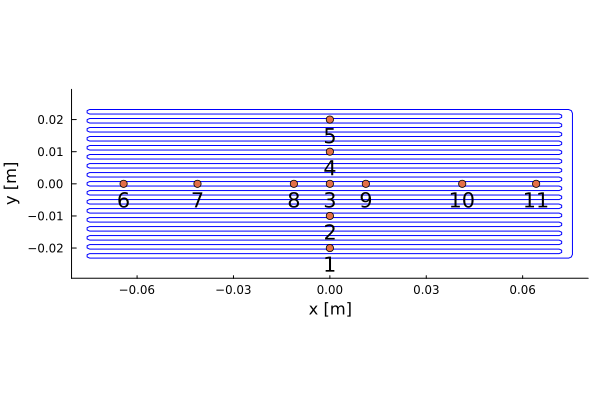

In [13]:
plot(OHP(),SimuResult)
scatter!(x2Dsensors[RTD_for_plotting],y2Dsensors[RTD_for_plotting])
annotate!(x2Dsensors[RTD_for_plotting], y2Dsensors[RTD_for_plotting].-0.005, RTD_for_plotting)

plot temperature curve

In [14]:
T_offset = 18.

18.0

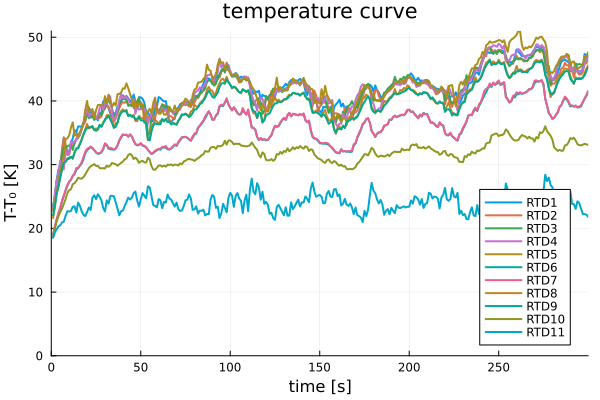

In [15]:
plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult)
# plot!(OHPTexp() ,RTD_for_plotting,(RTDt,RTD)     ,SimuResult)

  ### 2D interpolated thermal conductance

In [16]:
ihot = 3 # hot sensor  for calculating thermal conductance
icold = 11 # cold sensor  for calculating thermal conductance;

11

plot them separately

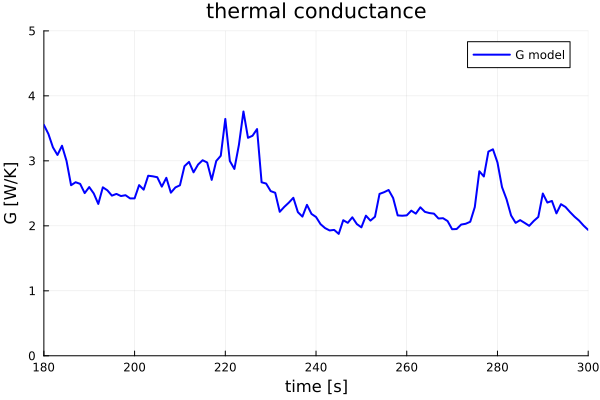

In [17]:
plot(OHPCond(),(ihot,icold),(t_hist,g_hist),SimuResult,xlim=(180,300),ylim=(0,5))

In [88]:
read_path = "/Users/yuxuanli/Documents/Hoffman/zach012/numedata/Zach_300s_30D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{270, 100, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

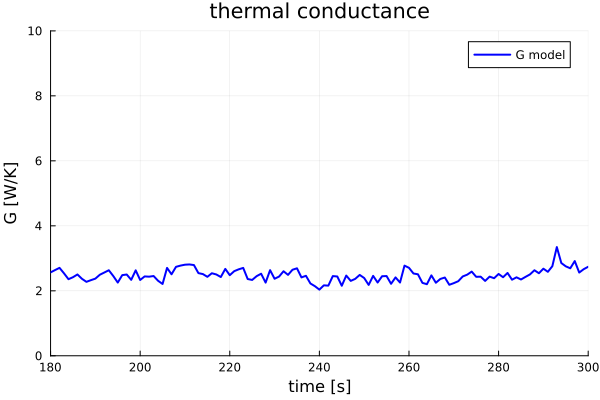

In [89]:
plot(OHPCond(),(ihot,icold),(t_hist,g_hist),SimuResult,xlim=(180,300),ylim=(0,10))

# 30 degrees, Hc = 1300 [W/K]

In [197]:
# read_path = "/Users/yuxuanli/Documents/Hoffman/zach004/numedata/Zach_300s_30D.jld2";
# SimuResult = load(read_path)["SimulationResult"];
# t_hist,g_hist = getTcurve(plate_sensors,SimuResult);

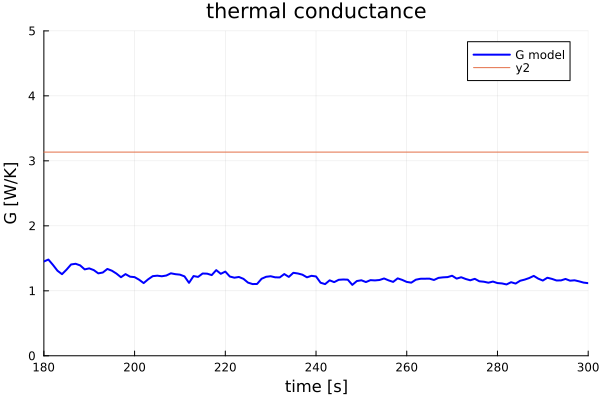

In [198]:
plot(OHPCond(),(ihot,icold),(t_hist,g_hist),SimuResult,xlim=(180,300),ylim=(0,5))
plot!([0,300],[3.134,3.134])

# 30 degrees, Hc = 2300 [W/K]

In [219]:
# read_path = "/Users/yuxuanli/Documents/Hoffman/zach002/numedata/Zach_300s_30D.jld2";
# SimuResult = load(read_path)["SimulationResult"];
# t_hist,g_hist = getTcurve(plate_sensors,SimuResult);

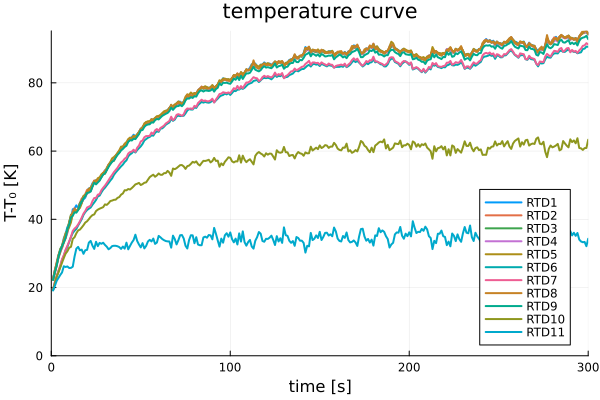

In [218]:
plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult)
# plot!(OHPTexp() ,RTD_for_plotting,(RTDt,RTD)     ,SimuResult)

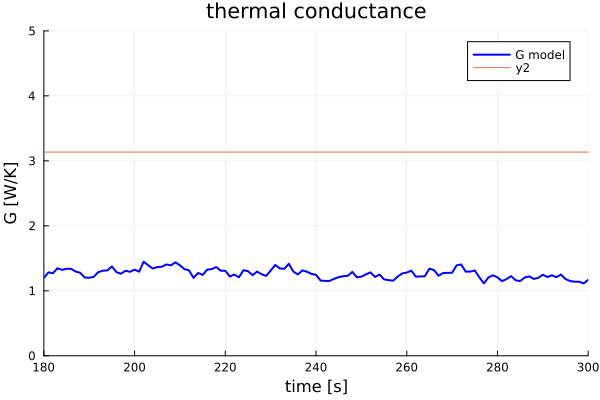

In [191]:
plot(OHPCond(),(ihot,icold),(t_hist,g_hist),SimuResult,xlim=(180,300),ylim=(0,5))
plot!([0,300],[3.134,3.134])

# 30 degrees, Hc = 5000 [W/K]

In [98]:
read_path = "/Users/yuxuanli/Documents/Hoffman/zach012/numedata/Zach_300s_30D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{270, 100, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

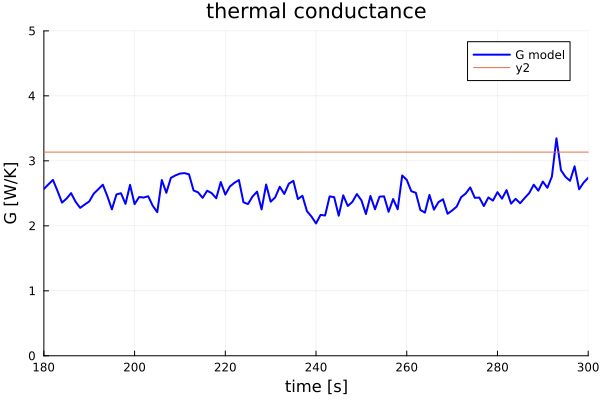

In [100]:
plot(OHPCond(),(ihot,icold),(t_hist,g_hist),SimuResult,xlim=(180,300),ylim=(0,5))
plot!([0,300],[3.134,3.134])

# 45 degrees, Hc = 5000 [W/K], 70W

In [101]:
read_path = "/Users/yuxuanli/Documents/Hoffman/zach012/numedata/Zach_300s_45D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{270, 100, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

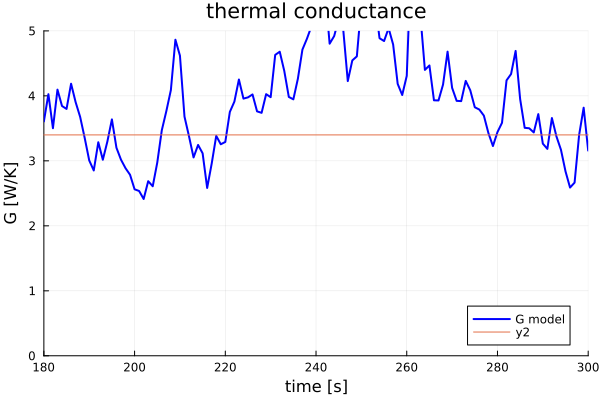

In [102]:
plot(OHPCond(),(ihot,icold),(t_hist,g_hist),SimuResult,xlim=(180,300),ylim=(0,5))
plot!([0,300],[3.399,3.399])

# 60 degrees, Hc = 5000 [W/K], 70W

In [103]:
read_path = "/Users/yuxuanli/Documents/Hoffman/zach012/numedata/Zach_300s_60D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{270, 100, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

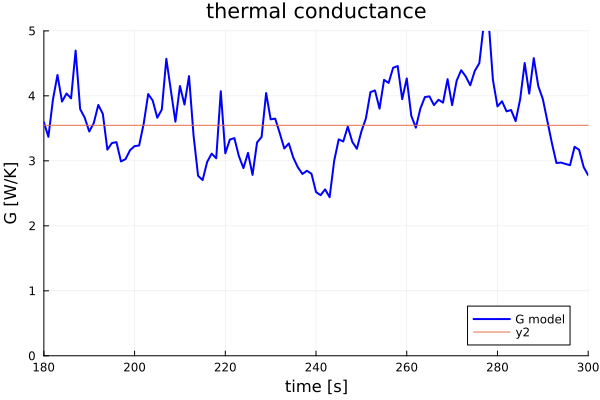

In [104]:
plot(OHPCond(),(ihot,icold),(t_hist,g_hist),SimuResult,xlim=(180,300),ylim=(0,5))
plot!([0,300],[3.547,3.547])

# 60 degrees, Hc = 3300 [W/K], 70W

In [208]:
# read_path = "/Users/yuxuanli/Documents/Hoffman/zach003/numedata/Zach_300s_60D.jld2";
# SimuResult = load(read_path)["SimulationResult"];
# t_hist,g_hist = getTcurve(plate_sensors,SimuResult);

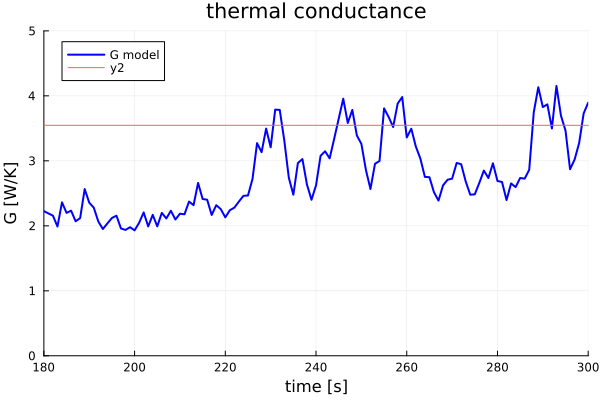

In [209]:
plot(OHPCond(),(ihot,icold),(t_hist,g_hist),SimuResult,xlim=(180,300),ylim=(0,5))
plot!([0,300],[3.547,3.547])

In [128]:
# read_path = "../numedata/ILMsolution.jld2"
read_path = "/Users/yuxuanli/Documents/Hoffman/zach008/numedata/Zach_300s_30D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{270, 100, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

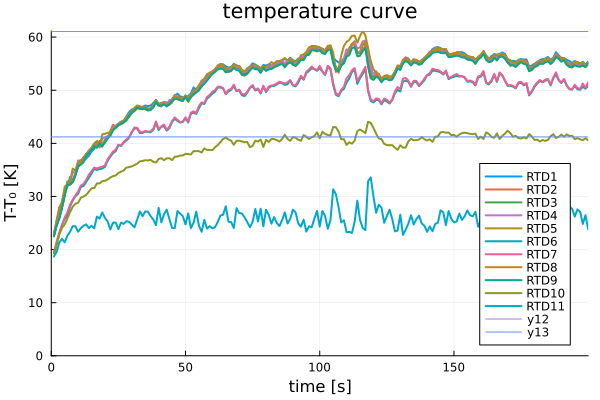

In [129]:
plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult)
plot!([0,300],[61.056,61.056])
plot!([0,300],[41.208,41.208])

## different inclination angles (80W)

In [116]:
l = @layout [a b; c d]

# read_path = "../numedata/ILMsolution.jld2"
read_path = "/Users/yuxuanli/Documents/Hoffman/zach013/numedata/Zach_300s_15D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
p1 = plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult,legend=false,title="80W, 15 Degree")
# plot!([0,300],[61.056,61.056])
# plot!([0,300],[41.208,41.208])
read_path = "/Users/yuxuanli/Documents/Hoffman/zach013/numedata/Zach_300s_30D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
p2 = plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult,legend=false,title="80W, 30 Degree")

read_path = "/Users/yuxuanli/Documents/Hoffman/zach013/numedata/Zach_300s_45D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
p3 = plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult,legend=false,title="80W, 45 Degree")

read_path = "/Users/yuxuanli/Documents/Hoffman/zach013/numedata/Zach_300s_60D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
p4 = plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult,legend=false,title="80W, 60 Degree")

plot(p1, p2, p3, p4, layout = l)

savefig("four_cases_80W.svg")

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 272, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 272, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{272, 100, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/four_cases_80W.svg"

## different inclination angles (60W)

In [121]:
l = @layout [a b; c d]

# read_path = "../numedata/ILMsolution.jld2"
read_path = "/Users/yuxuanli/Documents/Hoffman/zach011/numedata/Zach_300s_15D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
p1 = plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult,legend=false,title="60W, 15 Degree")
# plot!([0,300],[61.056,61.056])
# plot!([0,300],[41.208,41.208])
read_path = "/Users/yuxuanli/Documents/Hoffman/zach011/numedata/Zach_300s_30D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
p2 = plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult,legend=false,title="60W, 30 Degree")

read_path = "/Users/yuxuanli/Documents/Hoffman/zach011/numedata/Zach_300s_45D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
p3 = plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult,legend=false,title="60W, 45 Degree")

read_path = "/Users/yuxuanli/Documents/Hoffman/zach011/numedata/Zach_300s_60D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
p4 = plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult,legend=false,title="60W, 60 Degree")

plot(p1, p2, p3, p4, layout = l)

savefig("four_cases_60W.svg")

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 100, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{270, 100, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/four_cases_60W.svg"

## different inclination angles (90W)

In [120]:
l = @layout [a b; c d]

# read_path = "../numedata/ILMsolution.jld2"
read_path = "/Users/yuxuanli/Documents/Hoffman/zach014/numedata/Zach_300s_30D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
p1 = plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult,legend=false,title="90W, 30 Degree")
# plot!([0,300],[61.056,61.056])
# plot!([0,300],[41.208,41.208])
read_path = "/Users/yuxuanli/Documents/Hoffman/zach014/numedata/Zach_300s_45D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
p2 = plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult,legend=false,title="90W, 45 Degree")

read_path = "/Users/yuxuanli/Documents/Hoffman/zach014/numedata/Zach_300s_60D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
p3 = plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult,legend=false,title="90W, 60 Degree")

read_path = "/Users/yuxuanli/Documents/Hoffman/zach014/numedata/Zach_300s_90D.jld2";
SimuResult = load(read_path)["SimulationResult"];
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
p4 = plot(OHPTcurve(),Vector(RTD_for_plotting),(t_hist,g_hist .+ T_offset),SimuResult,legend=false,title="90W, 90 Degree")

plot(p1, p2, p3, p4, layout = l)

savefig("four_cases_90W.svg")

┌ Warning: some parameters could not be resolved for type NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Float64,BodyList,Dict{String, Any},Dict{String, Function},Dict{String, Vector{AbstractForcingModel}},Main.#timestep_fixed,ImmersedLayers.ILMMotion{RigidBodyMotion{2}}}; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/VWinU/src/data/reconstructing_datatypes.jl:617
┌ Warning: some parameters could not be resolved for type ConstrainedSystems.HETrapezoidalAB2Cache{true,false,Direct,RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 102, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},RecursiveArrayTools.ArrayPartition{Float64, Tuple{Nodes{Primal, 270, 102, Float64, Matrix{Float64}}, ScalarData{498, Float64, Vector{Float64}}, Vector{Float64}}},CartesianGrids.ImplicitDiffusion{270, 102, false},Vector{Any},ILMSystem{true,JLD2.ReconstructedMutable{Symbol("NeumannHeatConductionProblem{CartesianGrids.Yang3,GridScaling,Flo

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/four_cases_90W.svg"

  ### Liquid slug velocity statistics

fix title and ylabel and legend

In [ ]:
plot(OHPV(), SimuResult::SimulationResult,ylimit=(-2,2))

  # Plot 1D interpolated curves

In [ ]:
@manipulate for i in 1:1:length(t)
    plot(OHP1DT(),i,SimuResult,xlim=(1,2))
    plot!(twinx(),OHPTwall(),i,SimuResult,xlim=(1,2))
#     plot!(twinx(),OHP1DΔT(),i,SimuResult,xlim=(1,2))
#     plot!(twinx(),OHP1DP(),i,SimuResult,xlim=(1,2))
end

  ### 1D sensor selector

In [ ]:
L = SimuResult.integrator_tube.p.tube.L
@manipulate for ξ in 0:1e-3:L
    plot(OHP(),SimuResult) # plot the ohp layout

    xprobe,yprobe = oneDtwoDtransform(ξ,SimuResult)
    scatter!([xprobe],[yprobe])
end

  # Plot 1D property curve for a fixed location sensor

In [ ]:
xsensors1D = [2.097, 3.0, 4,4.1]

θhist1D,phist1D = get1DTandP(xsensors1D, SimuResult);

plot(t,θhist1D,label=string.("ξ=", xsensors1D'),xlabel="time [s]", ylabel="temperature [K]")

  ### get boiling data (if there are any)

In [ ]:
if length(SimuResult.boil_hist) != 0
boil_data,boil_num_x,boil_num_t,t_boil,x2D_boil,y2D_boil,boil_dt = get_boil_matrix(SimuResult::SimulationResult);
end

boiling frequency scatter graph (if there are any)

In [ ]:
plt = plot()
if length(SimuResult.boil_hist) != 0
plt = plot(OHP(),SimuResult)
scatter!(x2D_boil,y2D_boil,
    colorbar=true,markeralpha=delta.(boil_num_x),colorbar_title="\n boiling frequency [Hz]",right_margin=3Plots.mm,marker_z=boil_num_x./SimuResult.tube_hist_t[end],markerstrokewidth=0,markercolor=cgrad(:greys, rev = true))
end
plt

boiling frequency curve (if there are any)

In [ ]:
plt = plot()
if length(SimuResult.boil_hist) != 0
plt = plot(t_boil,boil_num_t./boil_dt,
color=:orange, legend=:topleft, ylabel="f [HZ]",xlabel="time [s]", label="overall boiling frequency")
end
plt

  # Plot 2D graphs

  ### film and slug dynamics

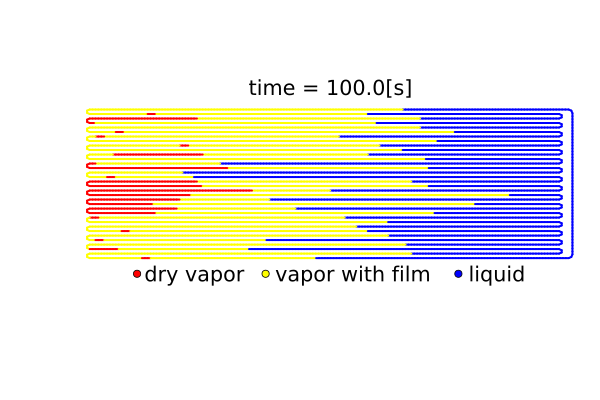

In [31]:
plot(OHPSlug(),100,SimuResult, aspectratio=1)

In [ ]:
@gif for i in eachindex(t)
    plot(OHPSlug(),i,SimuResult, aspectratio=1)
end

  ### plate T [K]

In [ ]:
@gif for i in eachindex(t)
    plot(OHPTemp(),i,SimuResult,clim=(291.2,384.0))
end

  ### 2D superheat

In [ ]:
@gif for i in eachindex(t)
    plot(OHPSuper(),i,SimuResult)
end

  ### 2D pressure

In [ ]:
@gif for i in eachindex(t)
    plot(OHPPres(),i,SimuResult)
end

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*